In [15]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.spatial import distance
import random

In [16]:
############################### user must change #######################
images_foler_path = 'C:/Users/ahmed/Desktop/ahmed folders/progamming/final project/github backend/101_ObjectCategories/'
pickle_file_path = 'C:/Users/ahmed/Desktop/ahmed folders/progamming/final project/github backend/features_caltech101.p'
########################################################################

images = list()
pca_features = list()
pca = list()
model = None
feat_extractor = None

In [17]:
def init_model():
    global model
    global feat_extractor
    model = keras.applications.VGG16(weights='imagenet', include_top=True)
    feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)

def get_history_data(pickle_path):
    global images
    global pca_features
    global pca
    
    objects = []
    with (open(pickle_path, "rb")) as openfile:
        while True:
            try:
                objects.append(pickle.load(openfile))
            except EOFError:
                break
          
        
    images = objects[0][0]
    pca_features = objects[0][1]
    pca = objects[0][2]

def load_image(path):
    path = images_foler_path + path
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

def load_image_from_outer_folder(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img( images_foler_path + images[idx] )
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

def get_similar_images(img_path):
    # load image and extract features
    new_image, x = load_image_from_outer_folder(img_path)
    new_features = feat_extractor.predict(x)
    new_pca_features = pca.transform(new_features)[0]

    # calculate its distance to all the other images pca feature vectors
    distances = [ distance.cosine(new_pca_features, feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[0:5]  # grab first 5
    results_image = get_concatenated_images(idx_closest, 200)

    # display the results
    plt.figure(figsize = (5,5))
    plt.imshow(new_image)
    plt.title("query image")

    # display the resulting images
    plt.figure(figsize = (16,12))
    plt.imshow(results_image)
    plt.title("result images")

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator PCA from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


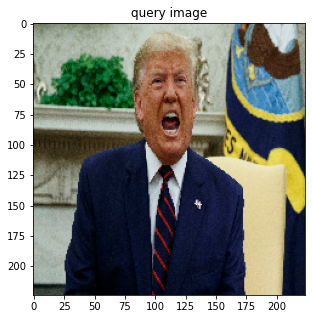

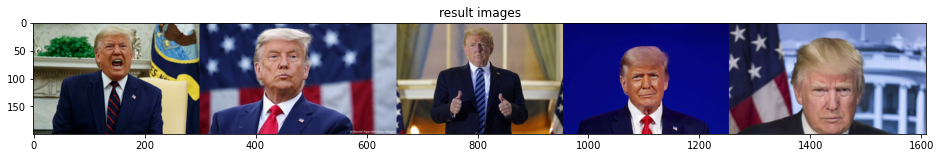

In [18]:
#testing
init_model()
get_history_data(pickle_file_path)
get_similar_images('C:/Users/ahmed/Desktop/ahmed folders/progamming/image_0007.jpg')

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator PCA from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


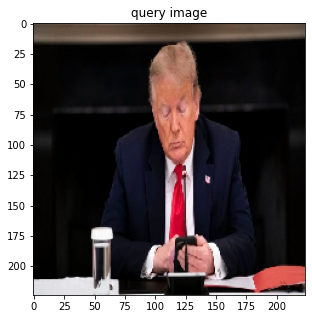

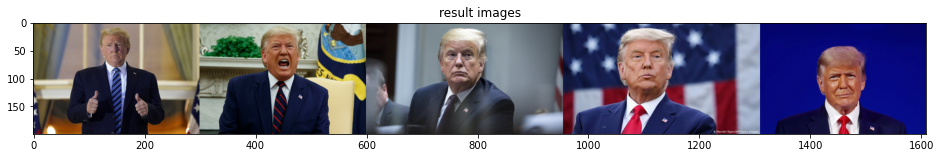

In [19]:
#testing
init_model()
get_history_data(pickle_file_path)
get_similar_images('C:/Users/ahmed/Downloads/R09c7a9ddbb507d744d22c16c95494fb6.jpg')